In [31]:
# Import full version of csvs, based on config.py
import pandas as pd
from random_access.configs import simulation_configs

# Import all csvs, based on config.py
dataframes = {}
for config in simulation_configs:
    label = config['label'].replace(' ', '_').lower()
    csv_file = f"csv/obss_simulation_{label}.csv"
    dataframes[label] = pd.read_csv(csv_file)

# Hitmap for channel utilization

In [ ]:
# import ast

# df = dataframes['s2_2_fshort_npca_0']

# ch = 0
# backoff_condition = df[f'backoff_ch_{ch}'].apply(lambda x: ast.literal_eval(x).count(0) == 1)
# print(f"{df[backoff_condition][f'channel_{ch}_occupied_until'].astype(bool).sum()}/{len(df)}")

82745/100000


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import ast
import re

# 채널 utilization 계산 함수
def get_channel_utilization(label):
    df = dataframes[label]
    utilization = []
    for ch in ['0', '1']:
        backoff_condition = df[f'backoff_ch_{ch}'].apply(lambda x: ast.literal_eval(x).count(0) == 1)
        utilization.append(
            df[backoff_condition][f'channel_{ch}_occupied_until'].astype(bool).sum() / len(df)
        )
    return utilization

# 모든 label에 대해 utilization 수집
records = []
for label in dataframes.keys():
    util_ch0, util_ch1 = get_channel_utilization(label)
    
    match = re.match(r's(\d+)_(\d+)_f(short|long)_npca_(\d)', label)
    if match:
        ch0 = int(match.group(1))
        ch1 = int(match.group(2))
        frame = match.group(3)
        npca = int(match.group(4))  # ← npca 값을 정수로 추출

        records.append({
            "label": label,
            "ch0": ch0,
            "ch1": ch1,
            "frame": frame,
            "npca": npca,
            "util_ch0": util_ch0,
            "util_ch1": util_ch1
        })

df_util = pd.DataFrame(records)


In [8]:
dataframes.keys()  # 데이터프레임 키 확인

dict_keys(['s2_2_fshort_npca_1', 's2_2_fshort_npca_0', 's2_2_flong_npca_1', 's2_2_flong_npca_0', 's2_6_fshort_npca_1', 's2_6_fshort_npca_0', 's2_6_flong_npca_1', 's2_6_flong_npca_0', 's2_10_fshort_npca_1', 's2_10_fshort_npca_0', 's2_10_flong_npca_1', 's2_10_flong_npca_0', 's6_2_fshort_npca_1', 's6_2_fshort_npca_0', 's6_2_flong_npca_1', 's6_2_flong_npca_0', 's6_6_fshort_npca_1', 's6_6_fshort_npca_0', 's6_6_flong_npca_1', 's6_6_flong_npca_0', 's6_10_fshort_npca_1', 's6_10_fshort_npca_0', 's6_10_flong_npca_1', 's6_10_flong_npca_0', 's10_2_fshort_npca_1', 's10_2_fshort_npca_0', 's10_2_flong_npca_1', 's10_2_flong_npca_0', 's10_6_fshort_npca_1', 's10_6_fshort_npca_0', 's10_6_flong_npca_1', 's10_6_flong_npca_0', 's10_10_fshort_npca_1', 's10_10_fshort_npca_0', 's10_10_flong_npca_1', 's10_10_flong_npca_0'])

In [15]:
df_util[(df_util["frame"] == "short") & (df_util["npca"] == 1)]

,label,ch0,ch1,frame,npca,util_ch0,util_ch1
0,s2_2_fshort_npca_1,2,2,short,1,0.81520,0.68028
4,s2_6_fshort_npca_1,2,6,short,1,0.82401,0.65074
8,s2_10_fshort_npca_1,2,10,short,1,0.83304,0.63093
12,s6_2_fshort_npca_1,6,2,short,1,0.76201,0.67221
16,s6_6_fshort_npca_1,6,6,short,1,0.76743,0.65571
20,s6_10_fshort_npca_1,6,10,short,1,0.76799,0.61743
24,s10_2_fshort_npca_1,10,2,short,1,0.71671,0.68838
28,s10_6_fshort_npca_1,10,6,short,1,0.72423,0.65175
32,s10_10_fshort_npca_1,10,10,short,1,0.71973,0.61842


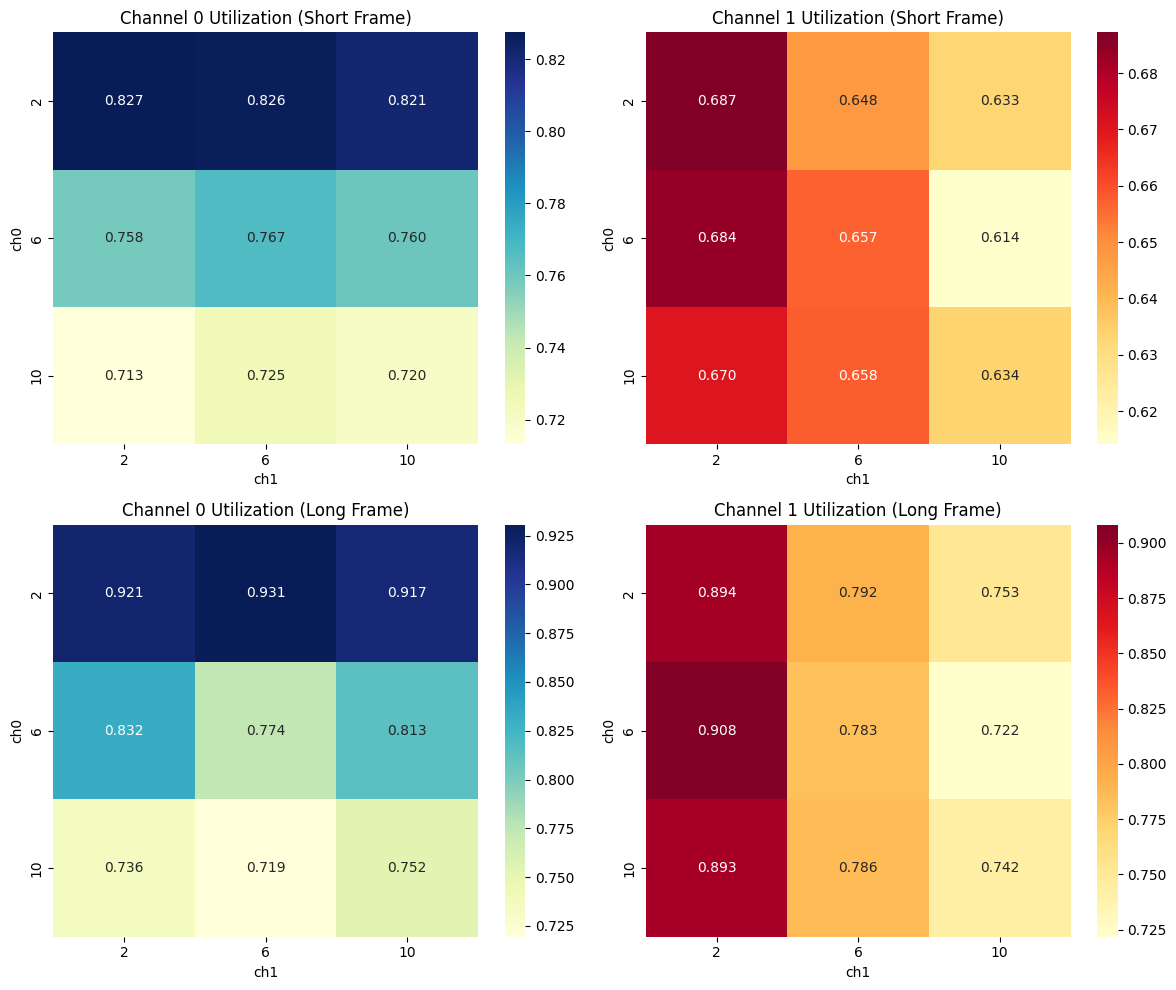

In [15]:
# NPCA OFF
df_short = df_util[(df_util["frame"] == "short") & (df_util["npca"] == 0)]
df_long = df_util[(df_util["frame"] == "long") & (df_util["npca"] == 0)]

pivot_ch0_short = df_short.pivot(index="ch0", columns="ch1", values="util_ch0")
pivot_ch1_short = df_short.pivot(index="ch0", columns="ch1", values="util_ch1")
pivot_ch0_long = df_long.pivot(index="ch0", columns="ch1", values="util_ch0")
pivot_ch1_long = df_long.pivot(index="ch0", columns="ch1", values="util_ch1")


# 히트맵 시각화
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(pivot_ch0_short, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Channel 0 Utilization (Short Frame)")

plt.subplot(2, 2, 2)
sns.heatmap(pivot_ch1_short, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Channel 1 Utilization (Short Frame)")

plt.subplot(2, 2, 3)
sns.heatmap(pivot_ch0_long, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Channel 0 Utilization (Long Frame)")

plt.subplot(2, 2, 4)
sns.heatmap(pivot_ch1_long, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Channel 1 Utilization (Long Frame)")

plt.tight_layout()
plt.show()


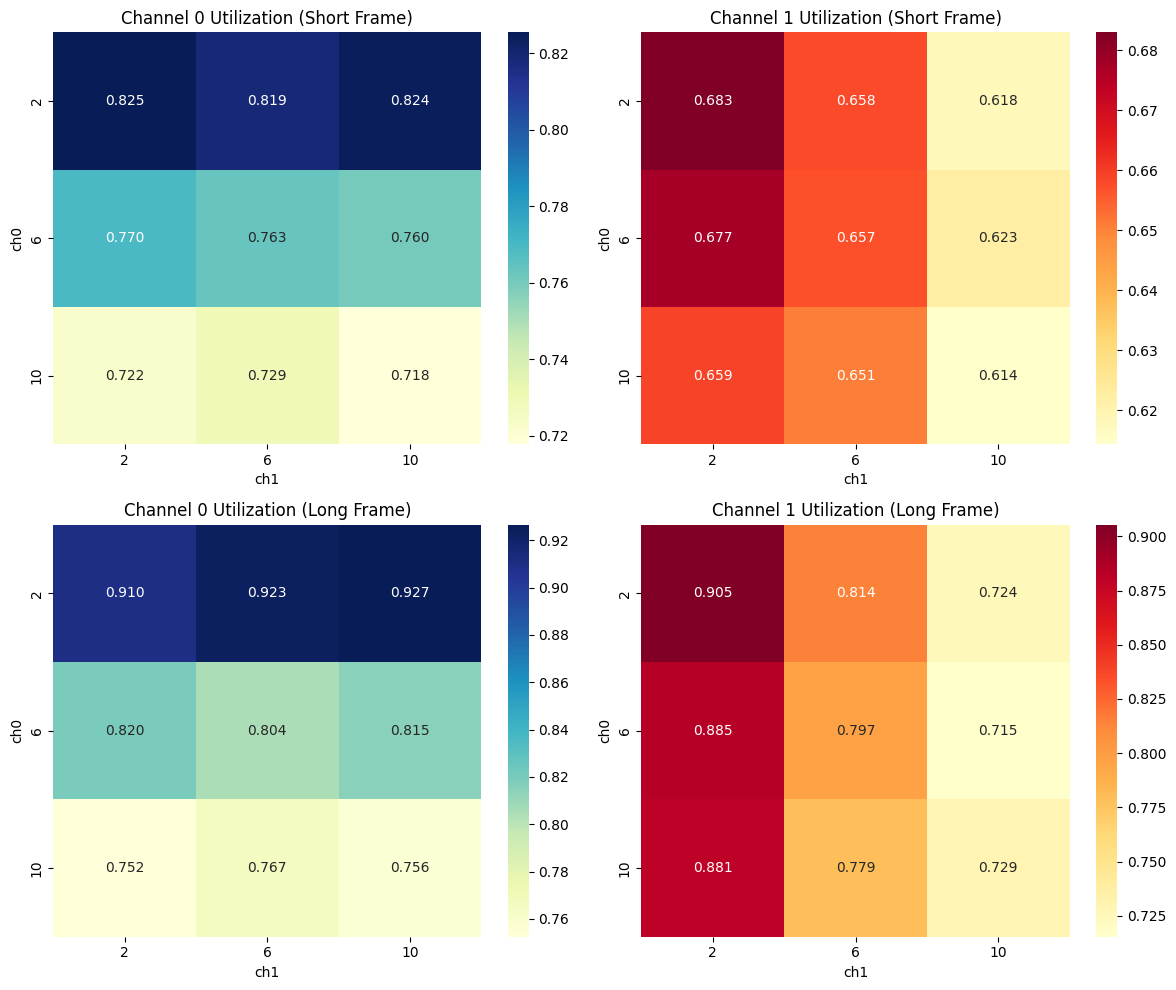

In [4]:
# NPCA ON
df_short = df_util[(df_util["frame"] == "short") & (df_util["npca"] == 1)]
df_long = df_util[(df_util["frame"] == "long") & (df_util["npca"] == 1)]

pivot_ch0_short = df_short.pivot(index="ch0", columns="ch1", values="util_ch0")
pivot_ch1_short = df_short.pivot(index="ch0", columns="ch1", values="util_ch1")
pivot_ch0_long = df_long.pivot(index="ch0", columns="ch1", values="util_ch0")
pivot_ch1_long = df_long.pivot(index="ch0", columns="ch1", values="util_ch1")


# 히트맵 시각화
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
sns.heatmap(pivot_ch0_short, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Channel 0 Utilization (Short Frame)")

plt.subplot(2, 2, 2)
sns.heatmap(pivot_ch1_short, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Channel 1 Utilization (Short Frame)")

plt.subplot(2, 2, 3)
sns.heatmap(pivot_ch0_long, annot=True, cmap="YlGnBu", fmt=".3f")
plt.title("Channel 0 Utilization (Long Frame)")

plt.subplot(2, 2, 4)
sns.heatmap(pivot_ch1_long, annot=True, cmap="YlOrRd", fmt=".3f")
plt.title("Channel 1 Utilization (Long Frame)")

plt.tight_layout()
plt.show()


# Tput per each STA

In [21]:
import ast
from collections import Counter

def get_successful_stas(label, channel=0):
    df = dataframes[label]
    col_backoff = f'backoff_ch_{channel}'
    col_state = f'states_ch_{channel}'

    success_counter = Counter()
    
    for i, row in df.iterrows():
        backoffs = ast.literal_eval(row[col_backoff])
        states = ast.literal_eval(row[col_state])
        
        # 0이 정확히 하나일 경우
        if backoffs.count(0) == 1:
            idx = backoffs.index(0)
            if states[idx] == 'primary_transmitting':
                success_counter[idx] += 1

    # Throughput fraction 계산
    simulation_time = len(df)
    throughput = pd.Series(success_counter).sort_index() / simulation_time
    return throughput

def get_jain_index(label, channel=0):
    sta_tp = get_successful_stas(label, channel=channel)
    mean_tp = sta_tp.mean()
    
    # 제인 지수 계산
    if mean_tp == 0:
        return float('inf')  # 모든 STA가 실패한 경우
    else:
        return (sta_tp.sum())**2 / (len(sta_tp) * (sta_tp**2).sum())


In [ ]:
# 출력
for label in dataframes.keys():
    for ch in [0, 1]:
        fairness = []
        sta_tp = get_successful_stas(label, channel=ch)
        print(f"Channel {ch} STA Throughput (Success/μs) for {label}:")
        print(sta_tp)
        print()


In [ ]:
# print(get_jain_index('s2_2_fshort_npca_0', channel=0))
# print(get_jain_index('s2_2_fshort_npca_0', channel=1))

# 제인 지수 출력
for label in dataframes.keys():
    for ch in [0, 1]:
        jain_index = get_jain_index(label, channel=ch)
        print(f"Jain's Fairness Index for Channel {ch} in {label}: {jain_index:.4f}")

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import ast
import re
from collections import Counter
import os
from random_access.configs import simulation_configs

# Step 1: 데이터프레임들 불러오기
labels = [config["label"] for config in simulation_configs]
dataframes = {
    label: pd.read_csv(f"csv/obss_simulation_{label}.csv") for label in labels
}


KeyError: 'fair_ch0'

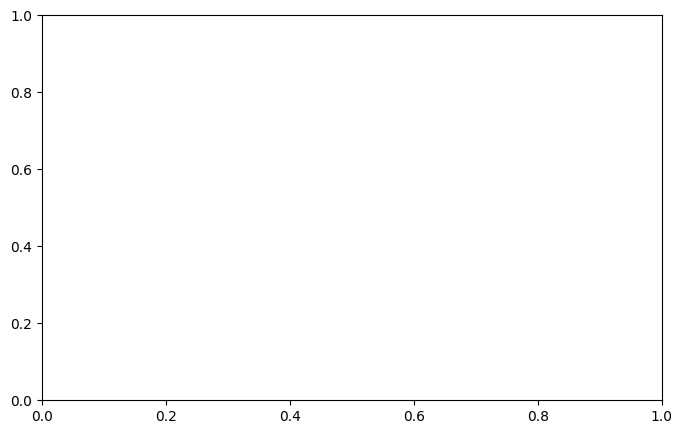

In [ ]:
# Step 2: 성공 횟수 계산 함수
def get_successful_stas(label, channel=0):
    df = dataframes[label]
    col_backoff = f'backoff_ch_{channel}'
    col_state = f'states_ch_{channel}'
    
    success_counter = Counter()
    
    for _, row in df.iterrows():
        backoffs = ast.literal_eval(row[col_backoff])
        states = ast.literal_eval(row[col_state])
        if backoffs.count(0) == 1:
            idx = backoffs.index(0)
            if states[idx] == 'primary_transmitting':
                success_counter[idx] += 1
    return pd.Series(success_counter).sort_index()

# Step 3: Jain 지수 계산
def get_jain_index(label, channel=0):
    sta_tp = get_successful_stas(label, channel=channel)
    mean_tp = sta_tp.mean()
    if mean_tp == 0:
        return float('inf')
    return (sta_tp.sum())**2 / (len(sta_tp) * (sta_tp**2).sum())

# Step 4: Label 파싱
def parse_label(label):
    match = re.match(r's(\d+)_(\d+)_f(short|long)_npca_(\d+)', label)
    if match:
        return {
            "ch0": int(match.group(1)),
            "ch1": int(match.group(2)),
            "frame": match.group(3),
            "npca": int(match.group(4))
        }

# Step 5: Jain 지수 수집
records = []
for label in dataframes:
    meta = parse_label(label)
    for ch in [0, 1]:
        fairness = get_jain_index(label, channel=ch)
        records.append({
            "label": label,
            "ch0": meta["ch0"],
            "ch1": meta["ch1"],
            "frame": meta["frame"],
            "npca": meta["npca"],
            "channel": ch,
            "fairness": fairness
        })
df_fairness = pd.DataFrame(records)

# Step 6: Plotting (Channel 0 기준)
colors = {2: 'blue', 6: 'green', 10: 'red'}
styles = {
    0: {"short": "dashed", "long": "dashdot"},
    1: {"short": "solid", "long": "dotted"},
}

# 유일한 ch0 값 목록
unique_ch0_values = sorted(df_fairness["ch0"].unique())


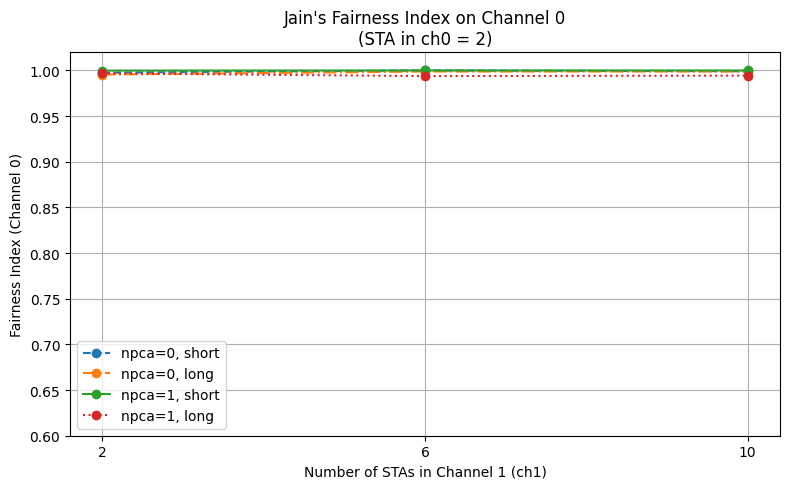

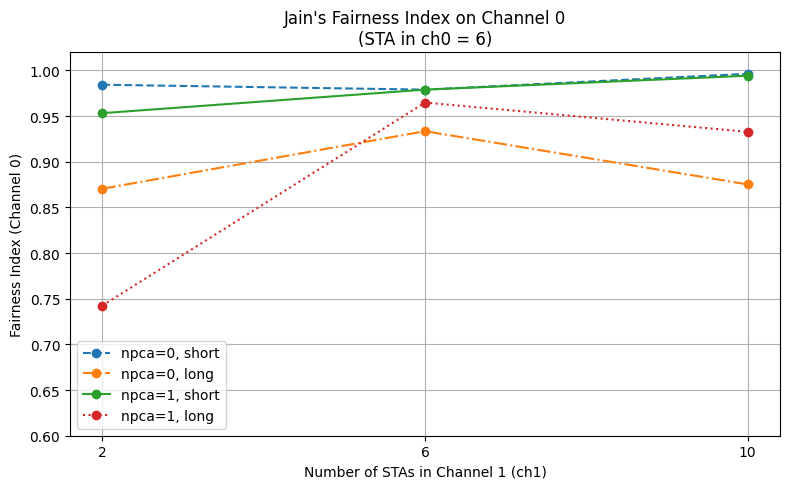

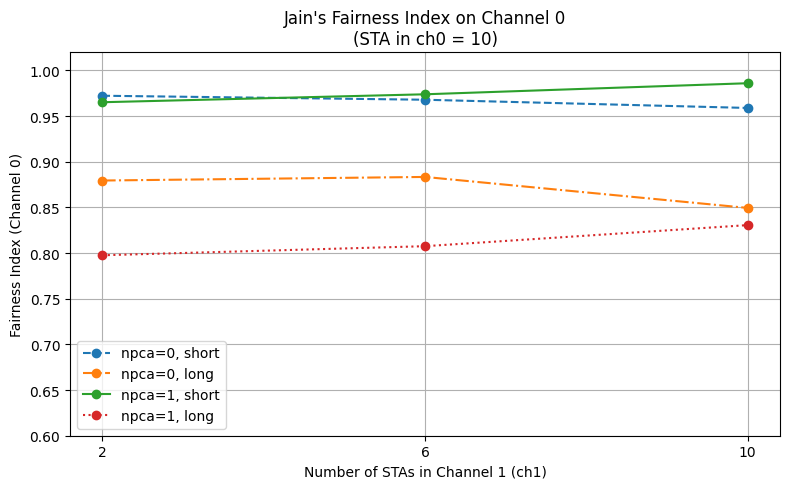

In [30]:

# 각 ch0 값에 대해 개별 plot 출력
for ch0_val in unique_ch0_values:
    fig, ax = plt.subplots(figsize=(8, 5))

    for npca in [0, 1]:
        for frame in ["short", "long"]:
            subset = df_fairness[
                (df_fairness["ch0"] == ch0_val) &
                (df_fairness["channel"] == 0) &
                (df_fairness["npca"] == npca) &
                (df_fairness["frame"] == frame)
            ].sort_values("ch1")
            if not subset.empty:
                label = f"npca={npca}, {frame}"
                ax.plot(subset["ch1"], subset["fairness"],
                        label=label,
                        linestyle=styles[npca][frame],
                        marker='o')
    ax.set_xticks(subset["ch1"].unique())
    ax.set_title(f"Jain's Fairness Index on Channel 0\n(STA in ch0 = {ch0_val})")
    ax.set_xlabel("Number of STAs in Channel 1 (ch1)")
    ax.set_ylabel("Fairness Index (Channel 0)")
    ax.set_ylim(0.6, 1.02)
    ax.grid(True)
    ax.legend()
    plt.tight_layout()
    plt.show()